In [1]:
import requests
from bs4 import BeautifulSoup
import openpyxl
from dataclasses import make_dataclass

In [3]:
Episode = make_dataclass("Episode", [("rating", float), ("name", str), ("number", int), ("season", int)])

In [4]:
#https://www.imdb.com/title/tt0096697/episodes?season=33
show_id = 'tt0096697'
number_of_seasons = 33
episode_list = []
for i in range(1, number_of_seasons + 1):
    url = f'https://www.imdb.com/title/{show_id}/episodes?season={i}'
    source = requests.get(url)
    soup = BeautifulSoup(source.text, 'html.parser')
    
    episode_tag = soup.find('div', class_='list detail eplist')
    episodes = episode_tag.find_all('div', class_='list_item odd')
    even_episodes = episode_tag.find_all('div', class_='list_item even')
    episodes.extend(even_episodes)
    for ep in episodes:
        meta_content = ep.find('meta')
        episode_number = meta_content.attrs['content']
        rating = float(ep.find('span', class_='ipl-rating-star__rating').get_text())
        title = ep.find('strong').find('a').attrs['title']
        episode_list.append(Episode(season=i,name=title, number=episode_number, rating=rating))
    
    

AttributeError: 'NoneType' object has no attribute 'get_text'

In [5]:
episode_list

[Episode(rating=8.1, name='Simpsons Roasting on an Open Fire', number='1', season=1),
 Episode(rating=7.4, name="Homer's Odyssey", number='3', season=1),
 Episode(rating=8.0, name='Bart the General', number='5', season=1),
 Episode(rating=7.8, name='The Call of the Simpsons', number='7', season=1),
 Episode(rating=7.5, name='Life on the Fast Lane', number='9', season=1),
 Episode(rating=7.8, name='The Crepes of Wrath', number='11', season=1),
 Episode(rating=7.7, name='Some Enchanted Evening', number='13', season=1),
 Episode(rating=7.7, name='Bart the Genius', number='2', season=1),
 Episode(rating=7.7, name="There's No Disgrace Like Home", number='4', season=1),
 Episode(rating=7.6, name='Moaning Lisa', number='6', season=1),
 Episode(rating=7.7, name='The Telltale Head', number='8', season=1),
 Episode(rating=7.4, name="Homer's Night Out", number='10', season=1),
 Episode(rating=8.4, name='Krusty Gets Busted', number='12', season=1),
 Episode(rating=8.2, name='Bart Gets an F', numbe

In [77]:
episodes[0]

<div class="list_item odd">
<div class="image">
<a href="/title/tt0348034/" itemprop="url" title="Simpsons Roasting on an Open Fire"> <div class="hover-over-image zero-z-index" data-const="tt0348034">
<img alt="Simpsons Roasting on an Open Fire" class="zero-z-index" height="126" src="https://m.media-amazon.com/images/M/MV5BMGNjNWFlOWItOTYyMS00Y2UxLTg3MmUtMTM1NWE4MDBmNDRiXkEyXkFqcGdeQXVyNTAyODkwOQ@@._V1_UY126_UX224_AL_.jpg" width="224"/>
<div>S1, Ep1</div>
</div>
</a> </div>
<div class="info" itemprop="episodes" itemscope="" itemtype="http://schema.org/TVEpisode">
<meta content="1" itemprop="episodeNumber"/>
<div class="airdate">
            17 Dec. 1989
    </div>
<strong><a href="/title/tt0348034/" itemprop="name" title="Simpsons Roasting on an Open Fire">Simpsons Roasting on an Open Fire</a></strong>
<div class="ipl-rating-widget">
<div class="ipl-rating-star small">
<span class="ipl-rating-star__star">
<svg class="ipl-icon ipl-star-icon" fill="#000000" height="24" viewbox="0 0 24 24

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
episode_df = pd.DataFrame(episode_list)

In [23]:
episode_df.head(5)

,rating,name,number,season
0,8.1,Simpsons Roasting on an Open Fire,1,1
7,7.7,Bart the Genius,2,1
1,7.4,Homer's Odyssey,3,1
8,7.7,There's No Disgrace Like Home,4,1
2,8.0,Bart the General,5,1


In [115]:
#Five best and five worst episodes of all time
episode_df.sort_values('rating')

,rating,name,number,season
507,4.1,Lisa Goes Gaga,22,23
705,4.3,The Star of the Backstage,1,33
658,4.8,Bart vs. Itchy & Scratchy,18,30
183,5.1,"All Singing, All Dancing",11,9
277,5.5,Gump Roast,17,13
...,...,...,...,...
178,9.1,The City of New York vs. Homer Simpson,1,9
115,9.2,Who Shot Mr. Burns? Part One,25,6
166,9.2,You Only Move Twice,2,8
118,9.2,Treehouse of Horror V,6,6


In [22]:
#Last episode that was rated as highly as "A Serious Flanders" in season 33.
episode_df.sort_values(['season', 'number'], inplace=True)
episode_df[episode_df['season'] == 3 ]

,rating,name,number,season
35,8.6,Stark Raving Dad,1,3
47,7.8,Mr. Lisa Goes to Washington,2,3
36,8.2,When Flanders Failed,3,3
48,8.6,Bart the Murderer,4,3
37,8.4,Homer Defined,5,3
49,7.6,"Like Father, Like Clown",6,3
38,8.2,Treehouse of Horror II,7,3
50,7.9,Lisa's Pony,8,3
39,7.9,Saturdays of Thunder,9,3
51,8.8,Flaming Moe's,10,3


In [32]:
episode_df[:708][episode_df[:708]['rating'] >= 8.3].sort_values(['season', 'number'])

,rating,name,number,season
12,8.4,Krusty Gets Busted,12,1
27,8.4,Bart the Daredevil,8,2
18,8.8,"One Fish, Two Fish, Blowfish, Blue Fish",11,2
29,8.3,The Way We Was,12,2
20,8.3,"Oh Brother, Where Art Thou?",15,2
...,...,...,...,...
184,8.3,The Joy of Sect,13,9
201,8.4,Trash of the Titans,22,9
267,8.6,Trilogy of Error,18,12
490,8.3,Holidays of Future Passed,9,23


In [ ]:
episode_df['number'].dtype

In [19]:
episode_df['number'] = episode_df['number'].astype(int)

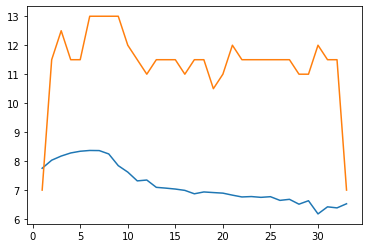

In [24]:
ratings_by_season = episode_df.groupby('season').mean('rating')
plt.plot(ratings_by_season)

In [129]:
plt.show()